In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import missingno as msg
import math
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('deliveries.csv')
df1 = pd.read_csv('matches.csv')

In [3]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [6]:
df1.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

# Ques 1 - win ?

In [7]:
df['batting_team'] = df['batting_team'].replace({"Delhi Daredevils":"Delhi Capitals"})
df['bowling_team'] = df['bowling_team'].replace({"Delhi Daredevils":"Delhi Capitals"})

df1['team1'] = df1['team1'].replace({"Delhi Daredevils":"Delhi Capitals"})
df1['team2'] = df1['team2'].replace({"Delhi Daredevils":"Delhi Capitals"})
df1['winner'] = df1['winner'].replace({"Delhi Daredevils":"Delhi Capitals"})


In [8]:
both_team = df1[((df1['team1'] == 'Delhi Capitals') & (df1['team2'] == 'Sunrisers Hyderabad')) | ((df1['team1'] == 'Sunrisers Hyderabad') & (df1['team2'] == 'Delhi Capitals'))]
both_team

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
20,21,2017,Hyderabad,2017-04-19,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,15,0,KS Williamson,"Rajiv Gandhi International Stadium, Uppal",CB Gaffaney,NJ Llong,NaN
38,39,2017,Delhi,2017-05-02,Sunrisers Hyderabad,Delhi Capitals,Delhi Daredevils,field,normal,0,Delhi Capitals,0,6,Mohammed Shami,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
393,394,2013,Delhi,2013-04-12,Delhi Capitals,Sunrisers Hyderabad,Delhi Daredevils,bat,normal,0,Sunrisers Hyderabad,0,3,A Mishra,Feroz Shah Kotla,Aleem Dar,Subroto Das,NaN
427,428,2013,Hyderabad,2013-05-04,Delhi Capitals,Sunrisers Hyderabad,Delhi Daredevils,bat,normal,0,Sunrisers Hyderabad,0,6,DJG Sammy,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,S Asnani,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
488,489,2014,Delhi,2014-05-10,Delhi Capitals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,1,Sunrisers Hyderabad,0,8,DW Steyn,Feroz Shah Kotla,RM Deshpande,BNJ Oxenford,NaN
530,531,2015,Visakhapatnam,2015-04-18,Delhi Capitals,Sunrisers Hyderabad,Delhi Daredevils,bat,normal,0,Delhi Capitals,4,0,JP Duminy,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,PG Pathak,S Ravi,NaN
560,561,2015,Raipur,2015-05-09,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,6,0,MC Henriques,Shaheed Veer Narayan Singh International Stadium,VA Kulkarni,S Ravi,NaN
617,618,2016,Hyderabad,2016-05-12,Sunrisers Hyderabad,Delhi Capitals,Delhi Daredevils,field,normal,0,Delhi Capitals,0,7,CH Morris,"Rajiv Gandhi International Stadium, Uppal",K Bharatan,M Erasmus,NaN
627,628,2016,Raipur,2016-05-20,Sunrisers Hyderabad,Delhi Capitals,Delhi Daredevils,field,normal,0,Delhi Capitals,0,6,KK Nair,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN


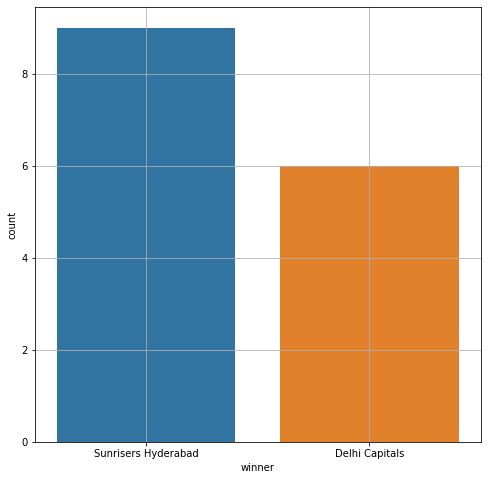

Sunrisers Hyderabad    9
Delhi Capitals         6
Name: winner, dtype: int64


In [9]:
plt.figure(figsize = (8,8))
sb.countplot(both_team['winner'])
plt.grid()
plt.show()
print(both_team['winner'].value_counts())

In [10]:
# last 3 seasons
recent = both_team[both_team['season'] >= 2017]

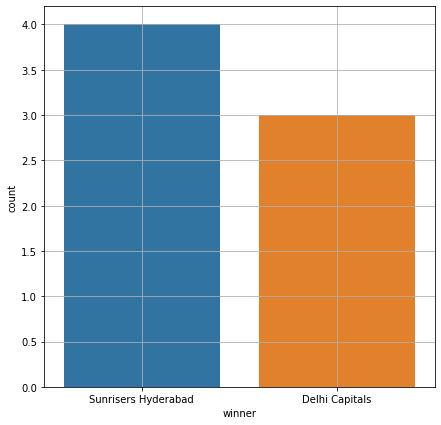

Sunrisers Hyderabad    4
Delhi Capitals         3
Name: winner, dtype: int64


In [11]:
plt.figure(figsize  =(7,7))
sb.countplot(recent['winner'])
plt.grid()
plt.show()
print(recent['winner'].value_counts())

In [12]:
both_team.groupby([ 'toss_decision' , 'toss_winner'])['winner'].count()

toss_decision  toss_winner        
bat            Delhi Daredevils       5
               Sunrisers Hyderabad    3
field          Delhi Capitals         1
               Delhi Daredevils       3
               Sunrisers Hyderabad    3
Name: winner, dtype: int64

In [13]:
recent.groupby([ 'toss_decision' , 'toss_winner'])['winner'].count()

toss_decision  toss_winner        
bat            Delhi Daredevils       2
               Sunrisers Hyderabad    1
field          Delhi Capitals         1
               Delhi Daredevils       1
               Sunrisers Hyderabad    2
Name: winner, dtype: int64

# Take Aways:
### 1 - Sunrisers have won 9 matches and DC 6
### 2 -In the past 3 years , SRH has won 4 and DC 3 match
### 3 - In the last face -off , SRH has won the match
### 4 -The match is going to be held in Dubai International Stadium

# Ques 1 ans - DC

In [14]:
###################################################################################################################################

# Ques 2 -Total runs scored ?

In [27]:
main_df_team = df[(((df['batting_team'] == 'Sunrisers Hyderabad')  & (df['bowling_team'] == 'Delhi Capitals')) | ((df['batting_team'] == 'Delhi Capitals')  & (df['bowling_team'] == 'Sunrisers Hyderabad')))]
main_df_team

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
4810,21,1,Sunrisers Hyderabad,Delhi Capitals,1,1,DA Warner,S Dhawan,J Yadav,0,...,0,0,1,0,1,1,2,NaN,NaN,NaN
4811,21,1,Sunrisers Hyderabad,Delhi Capitals,1,2,S Dhawan,DA Warner,J Yadav,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
4812,21,1,Sunrisers Hyderabad,Delhi Capitals,1,3,S Dhawan,DA Warner,J Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
4813,21,1,Sunrisers Hyderabad,Delhi Capitals,1,4,DA Warner,S Dhawan,J Yadav,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4814,21,1,Sunrisers Hyderabad,Delhi Capitals,1,5,DA Warner,S Dhawan,J Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178586,11413,2,Delhi Capitals,Sunrisers Hyderabad,20,2,A Mishra,K Paul,K Ahmed,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178587,11413,2,Delhi Capitals,Sunrisers Hyderabad,20,3,K Paul,A Mishra,K Ahmed,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178588,11413,2,Delhi Capitals,Sunrisers Hyderabad,20,4,K Paul,A Mishra,K Ahmed,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178589,11413,2,Delhi Capitals,Sunrisers Hyderabad,20,5,A Mishra,K Paul,K Ahmed,0,...,0,0,0,0,0,0,0,A Mishra,obstructing the field,NaN


In [40]:
only_dc = main_df_team[main_df_team['batting_team'] == 'Delhi Capitals']
only_dc

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
4933,21,2,Delhi Capitals,Sunrisers Hyderabad,1,1,SV Samson,SW Billings,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4934,21,2,Delhi Capitals,Sunrisers Hyderabad,1,2,SV Samson,SW Billings,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
4935,21,2,Delhi Capitals,Sunrisers Hyderabad,1,3,SW Billings,SV Samson,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4936,21,2,Delhi Capitals,Sunrisers Hyderabad,1,4,SW Billings,SV Samson,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4937,21,2,Delhi Capitals,Sunrisers Hyderabad,1,5,SW Billings,SV Samson,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178586,11413,2,Delhi Capitals,Sunrisers Hyderabad,20,2,A Mishra,K Paul,K Ahmed,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178587,11413,2,Delhi Capitals,Sunrisers Hyderabad,20,3,K Paul,A Mishra,K Ahmed,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178588,11413,2,Delhi Capitals,Sunrisers Hyderabad,20,4,K Paul,A Mishra,K Ahmed,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178589,11413,2,Delhi Capitals,Sunrisers Hyderabad,20,5,A Mishra,K Paul,K Ahmed,0,...,0,0,0,0,0,0,0,A Mishra,obstructing the field,NaN


In [42]:
dc_score = only_dc.pivot_table(index = ['match_id'] , values = ['total_runs' , 'batsman_runs'] , aggfunc=['count', 'sum'])

In [43]:
dc_score

count                     sum           
         batsman_runs total_runs batsman_runs total_runs
match_id                                                
21                122        122          169        176
39                117        117          186        189
394               125        125          107        114
428               117        117           74         80
469               123        123          174        180
489               121        121          138        143
531               126        126          158        167
561               121        121          153        157
618               112        112          147        150
628               126        126          147        161
7929              122        122          163        166
7935              121        121          187        190
11152             122        122          129        134
11321             124        124          155        164
11413             124        124          165        170

In [44]:
dc_score = pd.DataFrame(dc_score.to_records())
dc_score.columns

Index(['match_id', '('count', 'batsman_runs')', '('count', 'total_runs')',
       '('sum', 'batsman_runs')', '('sum', 'total_runs')'],
      dtype='object')

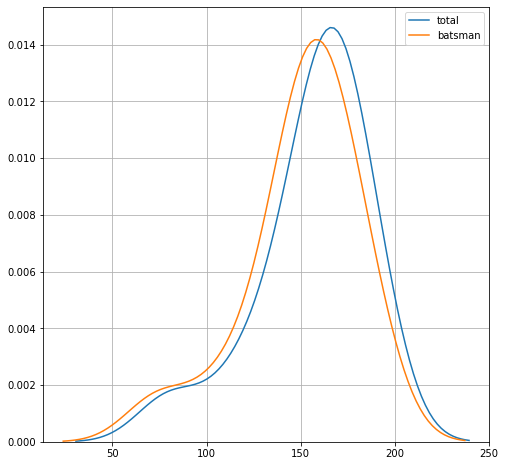

In [46]:
plt.figure(figsize = (8,8))
sb.kdeplot(dc_score["('sum\', \'total_runs\')"] , label = 'total')
sb.kdeplot(dc_score["('sum\', \'batsman_runs\')"] , label = 'batsman')
plt.grid()
plt.legend()
plt.show()


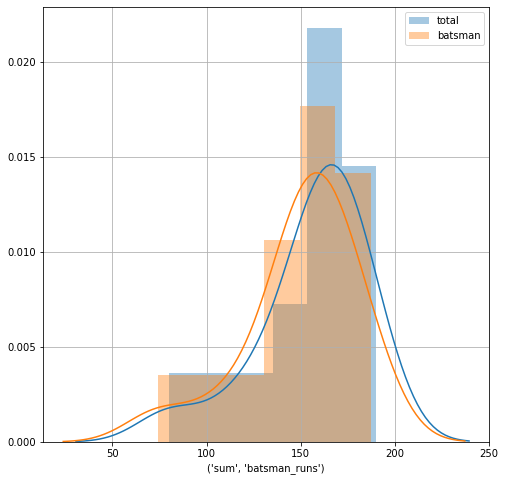

In [47]:
plt.figure(figsize = (8,8))
sb.distplot(dc_score["('sum\', \'total_runs\')"] , label = 'total')
sb.distplot(dc_score["('sum\', \'batsman_runs\')"] , label = 'batsman')
plt.grid()
plt.legend()
plt.show()


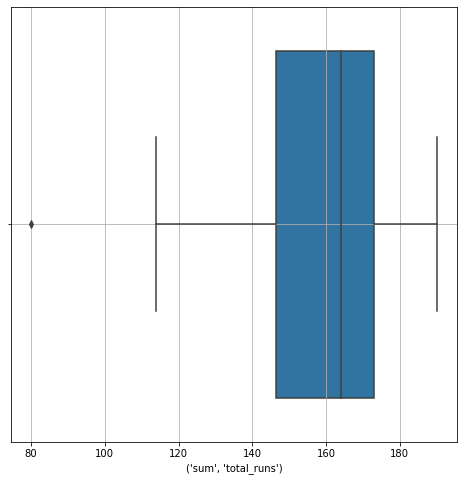

In [52]:
plt.figure(figsize = (8,8))
sb.boxplot(dc_score["('sum\', \'total_runs\')"])

plt.grid()

plt.show()


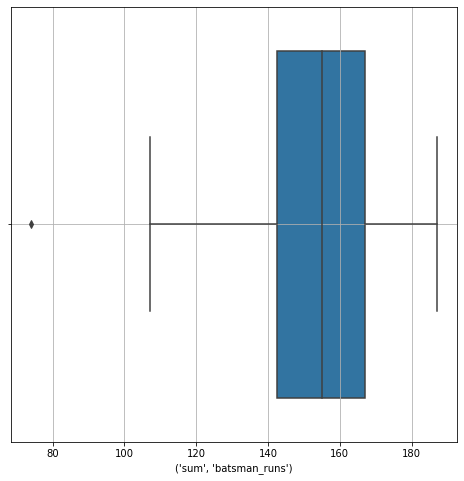

In [51]:

plt.figure(figsize = (8,8))
sb.boxplot(dc_score["('sum\', \'batsman_runs\')"])

plt.grid()

plt.show()


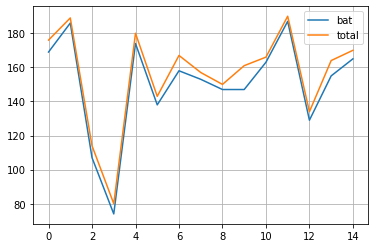

In [56]:
plt.plot(dc_score["('sum\', \'batsman_runs\')"] , label = 'bat')
plt.plot(dc_score["('sum\', \'total_runs\')"] , label = 'total')
plt.grid()
plt.legend()
plt.show()

In [57]:
print(dc_score["('sum\', \'batsman_runs\')"].describe())

count     15.000000
mean     150.133333
std       29.666881
min       74.000000
25%      142.500000
50%      155.000000
75%      167.000000
max      187.000000
Name: ('sum', 'batsman_runs'), dtype: float64


In [59]:
print(dc_score["('sum\', \'total_runs\')"].describe())

count     15.000000
mean     156.066667
std       29.224419
min       80.000000
25%      146.500000
50%      164.000000
75%      173.000000
max      190.000000
Name: ('sum', 'total_runs'), dtype: float64


In [60]:
# dc = 150 minimum

In [61]:
# lets check srh score

In [62]:
only_srh = main_df_team[main_df_team['batting_team'] == 'Sunrisers Hyderabad']
only_srh

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
4810,21,1,Sunrisers Hyderabad,Delhi Capitals,1,1,DA Warner,S Dhawan,J Yadav,0,...,0,0,1,0,1,1,2,NaN,NaN,NaN
4811,21,1,Sunrisers Hyderabad,Delhi Capitals,1,2,S Dhawan,DA Warner,J Yadav,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
4812,21,1,Sunrisers Hyderabad,Delhi Capitals,1,3,S Dhawan,DA Warner,J Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
4813,21,1,Sunrisers Hyderabad,Delhi Capitals,1,4,DA Warner,S Dhawan,J Yadav,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4814,21,1,Sunrisers Hyderabad,Delhi Capitals,1,5,DA Warner,S Dhawan,J Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178462,11413,1,Sunrisers Hyderabad,Delhi Capitals,20,5,Mohammad Nabi,DJ Hooda,K Paul,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178463,11413,1,Sunrisers Hyderabad,Delhi Capitals,20,6,Mohammad Nabi,DJ Hooda,K Paul,0,...,0,0,0,0,0,0,0,Mohammad Nabi,caught,AR Patel
178464,11413,1,Sunrisers Hyderabad,Delhi Capitals,20,7,DJ Hooda,Rashid Khan,K Paul,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178465,11413,1,Sunrisers Hyderabad,Delhi Capitals,20,8,Rashid Khan,B Kumar,K Paul,0,...,0,0,0,0,0,0,0,Rashid Khan,caught,RR Pant


In [63]:
srh_score = only_srh.pivot_table(index = ['match_id'] , values = ['total_runs' , 'batsman_runs'] , aggfunc=['count', 'sum'])
srh_score = pd.DataFrame(dc_score.to_records())
srh_score.columns

Index(['index', 'match_id', '('count', 'batsman_runs')',
       '('count', 'total_runs')', '('sum', 'batsman_runs')',
       '('sum', 'total_runs')'],
      dtype='object')

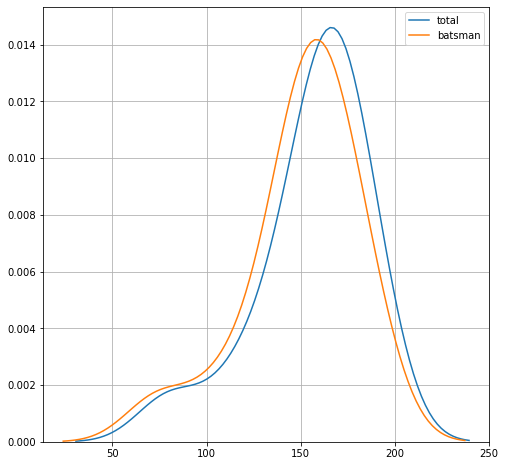

In [64]:
plt.figure(figsize = (8,8))
sb.kdeplot(srh_score["('sum\', \'total_runs\')"] , label = 'total')
sb.kdeplot(srh_score["('sum\', \'batsman_runs\')"] , label = 'batsman')
plt.grid()
plt.legend()
plt.show()


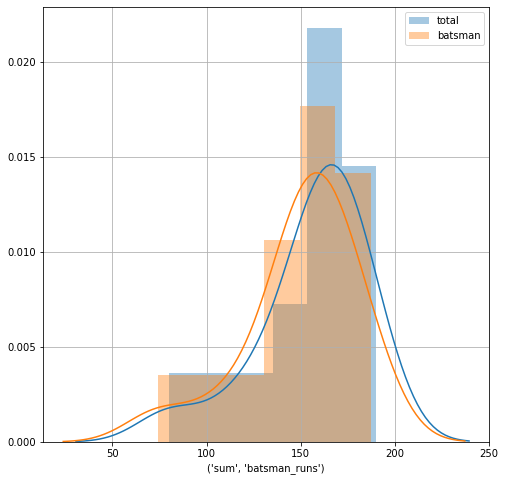

In [65]:
plt.figure(figsize = (8,8))
sb.distplot(srh_score["('sum\', \'total_runs\')"] , label = 'total')
sb.distplot(srh_score["('sum\', \'batsman_runs\')"] , label = 'batsman')
plt.grid()
plt.legend()
plt.show()


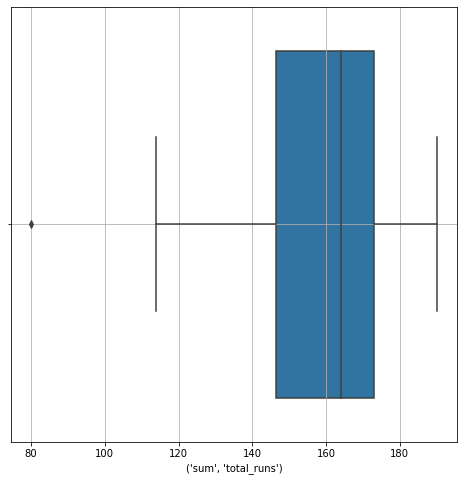

In [66]:
plt.figure(figsize = (8,8))
sb.boxplot(srh_score["('sum\', \'total_runs\')"])
plt.grid()
plt.show()

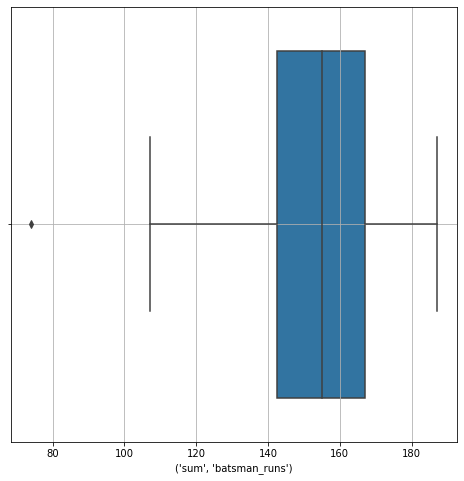

In [68]:
plt.figure(figsize = (8,8))
sb.boxplot(srh_score["('sum\', \'batsman_runs\')"])
plt.grid()
plt.show()

In [69]:
print(srh_score["('sum\', \'total_runs\')"].describe())

count     15.000000
mean     156.066667
std       29.224419
min       80.000000
25%      146.500000
50%      164.000000
75%      173.000000
max      190.000000
Name: ('sum', 'total_runs'), dtype: float64


In [70]:
print(srh_score["('sum\', \'batsman_runs\')"].describe())

count     15.000000
mean     150.133333
std       29.666881
min       74.000000
25%      142.500000
50%      155.000000
75%      167.000000
max      187.000000
Name: ('sum', 'batsman_runs'), dtype: float64


In [74]:
# srh - 150 min

# Take Aways;
### 1 - The median score of DC and SRH is 150 and 155 respectively
### 2 -Since ,the stadium is dubai interntional stadium , bowlers have an adv

# Ques 2 ans - Option 1 (< 320)

In [75]:
###############################################################################################################################

# Ques 3 - Total Catch

In [26]:
main_df_team

4810                        NaN
4811                        NaN
4812                        NaN
4813                        NaN
4814                        NaN
                  ...          
178586                      NaN
178587                      NaN
178588                      NaN
178589    obstructing the field
178590                      NaN
Name: dismissal_kind, Length: 3512, dtype: object

In [28]:
main_df_team['dismissal_kind'] = main_df_team['dismissal_kind'].replace({"caught and bowled" : "caught"})
srh_wicket_type = main_df_team[main_df_team['batting_team'] == 'Sunrisers Hyderabad']
srh_wicket_type

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
4810,21,1,Sunrisers Hyderabad,Delhi Capitals,1,1,DA Warner,S Dhawan,J Yadav,0,...,0,0,1,0,1,1,2,NaN,NaN,NaN
4811,21,1,Sunrisers Hyderabad,Delhi Capitals,1,2,S Dhawan,DA Warner,J Yadav,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
4812,21,1,Sunrisers Hyderabad,Delhi Capitals,1,3,S Dhawan,DA Warner,J Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
4813,21,1,Sunrisers Hyderabad,Delhi Capitals,1,4,DA Warner,S Dhawan,J Yadav,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4814,21,1,Sunrisers Hyderabad,Delhi Capitals,1,5,DA Warner,S Dhawan,J Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178462,11413,1,Sunrisers Hyderabad,Delhi Capitals,20,5,Mohammad Nabi,DJ Hooda,K Paul,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178463,11413,1,Sunrisers Hyderabad,Delhi Capitals,20,6,Mohammad Nabi,DJ Hooda,K Paul,0,...,0,0,0,0,0,0,0,Mohammad Nabi,caught,AR Patel
178464,11413,1,Sunrisers Hyderabad,Delhi Capitals,20,7,DJ Hooda,Rashid Khan,K Paul,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178465,11413,1,Sunrisers Hyderabad,Delhi Capitals,20,8,Rashid Khan,B Kumar,K Paul,0,...,0,0,0,0,0,0,0,Rashid Khan,caught,RR Pant


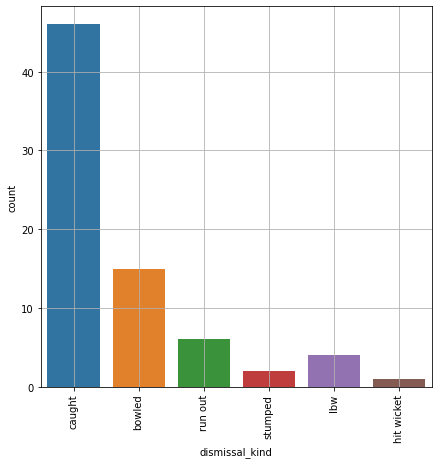

In [29]:
plt.figure(figsize = (7,7))
sb.countplot(srh_wicket_type['dismissal_kind'])
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [34]:
total_wicket_type = main_df_team.pivot_table(index = ['match_id'] , values = ['dismissal_kind'] , aggfunc = ['count'])

In [35]:
total_wicket_type = pd.DataFrame(total_wicket_type.to_records())
total_wicket_type

,match_id,"('count', 'dismissal_kind')"
0,21,9
1,39,7
2,394,15
3,428,14
4,469,5
5,489,9
6,531,12
7,561,8
8,618,11
9,628,11


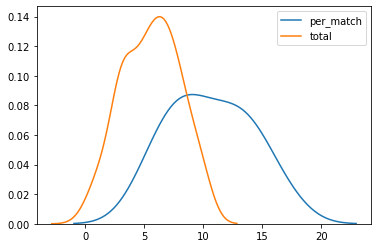

In [49]:
sb.kdeplot(total_wicket_type["('count\', \'dismissal_kind\')"] , label = 'per_match')
sb.kdeplot(srh_all_wicket_type["('count\', \'dismissal_kind\')"] , label = 'total')

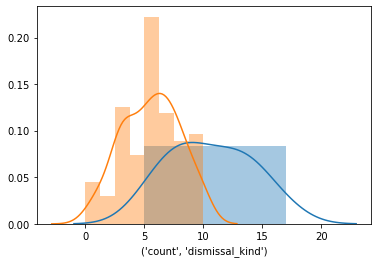

In [50]:
sb.distplot(total_wicket_type["('count\', \'dismissal_kind\')"] , label = 'per_match')
sb.distplot(srh_all_wicket_type["('count\', \'dismissal_kind\')"] , label = 'total')

In [39]:
total_wicket_type["('count\', \'dismissal_kind\')"].describe()

count    15.00000
mean     10.60000
std       3.54159
min       5.00000
25%       8.00000
50%      11.00000
75%      13.50000
max      17.00000
Name: ('count', 'dismissal_kind'), dtype: float64

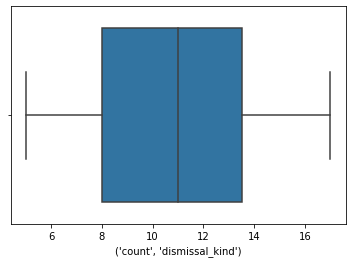

In [40]:
sb.boxplot(total_wicket_type["('count\', \'dismissal_kind\')"])

In [42]:
df['dismissal_kind'] = df['dismissal_kind'].replace({"caught and bowled" : "caught"})
srh_w_all = df[(((df['batting_team'] == 'Sunrisers Hyderabad')))]
srh_w_all

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178462,11413,1,Sunrisers Hyderabad,Delhi Capitals,20,5,Mohammad Nabi,DJ Hooda,K Paul,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178463,11413,1,Sunrisers Hyderabad,Delhi Capitals,20,6,Mohammad Nabi,DJ Hooda,K Paul,0,...,0,0,0,0,0,0,0,Mohammad Nabi,caught,AR Patel
178464,11413,1,Sunrisers Hyderabad,Delhi Capitals,20,7,DJ Hooda,Rashid Khan,K Paul,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178465,11413,1,Sunrisers Hyderabad,Delhi Capitals,20,8,Rashid Khan,B Kumar,K Paul,0,...,0,0,0,0,0,0,0,Rashid Khan,caught,RR Pant


In [43]:
srh_all_wicket_type = srh_w_all.pivot_table(index = ['match_id'] , values = ['dismissal_kind'] , aggfunc = ['count'])
srh_all_wicket_type = pd.DataFrame(srh_all_wicket_type.to_records())
srh_all_wicket_type

,match_id,"('count', 'dismissal_kind')"
0,1,4
1,6,1
2,10,8
3,14,6
4,19,6
...,...,...
103,11336,8
104,11339,6
105,11342,6
106,11345,7


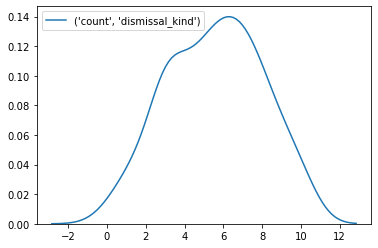

In [44]:
sb.kdeplot(srh_all_wicket_type["('count\', \'dismissal_kind\')"])

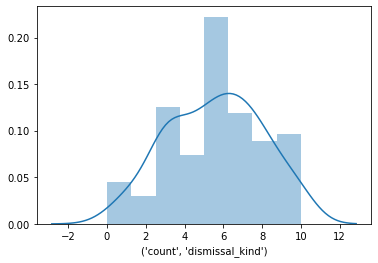

In [45]:
sb.distplot(srh_all_wicket_type["('count\', \'dismissal_kind\')"])

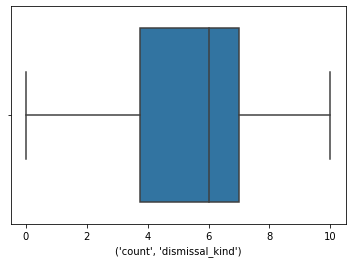

In [46]:
sb.boxplot(srh_all_wicket_type["('count\', \'dismissal_kind\')"])

In [51]:
srh_all_wicket_type["('count\', \'dismissal_kind\')"].describe()

count    108.000000
mean       5.564815
std        2.435229
min        0.000000
25%        3.750000
50%        6.000000
75%        7.000000
max       10.000000
Name: ('count', 'dismissal_kind'), dtype: float64

In [52]:
#df['dismissal_kind'] = df['dismissal_kind'].replace({"caught and bowled" : "caught"})
dc_w_all = df[(((df['batting_team'] == 'Delhi Capitals')))]
dc_w_all
dc_all_wicket_type = dc_w_all.pivot_table(index = ['match_id'] , values = ['dismissal_kind'] , aggfunc = ['count'])
dc_all_wicket_type = pd.DataFrame(dc_all_wicket_type.to_records())
dc_all_wicket_type

,match_id,"('count', 'dismissal_kind')"
0,5,9
1,9,4
2,15,6
3,18,7
4,21,5
...,...,...
172,11337,5
173,11341,10
174,11344,5
175,11413,7


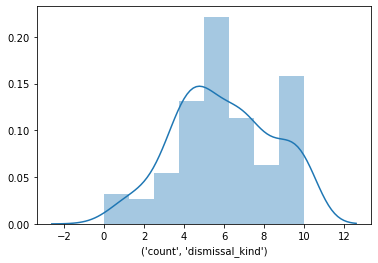

In [53]:
sb.distplot(dc_all_wicket_type["('count\', \'dismissal_kind\')"])

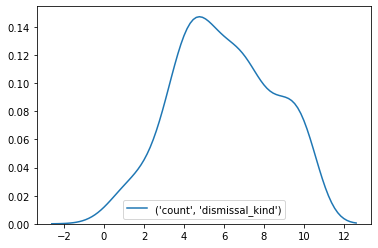

In [54]:
sb.kdeplot(dc_all_wicket_type["('count\', \'dismissal_kind\')"])

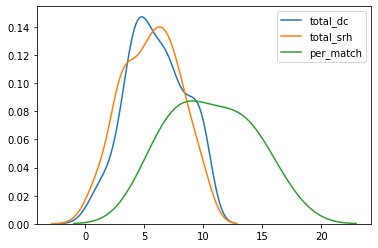

In [55]:
sb.kdeplot(dc_all_wicket_type["('count\', \'dismissal_kind\')"] , label = 'total_dc')
sb.kdeplot(srh_all_wicket_type["('count\', \'dismissal_kind\')"] , label = 'total_srh')
sb.kdeplot(total_wicket_type["('count\', \'dismissal_kind\')"] , label = 'per_match')

# Take Aways:
### 1 - Generally , the wickets taken by catch is around 4-5
### 2 - Dc sometimes give less wicket via catch 
### 3 - The total generally lies around 8-10

# Ques 3 ans - (8-12)

In [57]:
##########################################################################################################################

# Ques 4 - Score made by srh compared to dc  , more or less ?

In [58]:
main_df_team

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
4810,21,1,Sunrisers Hyderabad,Delhi Capitals,1,1,DA Warner,S Dhawan,J Yadav,0,...,0,0,1,0,1,1,2,NaN,NaN,NaN
4811,21,1,Sunrisers Hyderabad,Delhi Capitals,1,2,S Dhawan,DA Warner,J Yadav,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
4812,21,1,Sunrisers Hyderabad,Delhi Capitals,1,3,S Dhawan,DA Warner,J Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
4813,21,1,Sunrisers Hyderabad,Delhi Capitals,1,4,DA Warner,S Dhawan,J Yadav,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4814,21,1,Sunrisers Hyderabad,Delhi Capitals,1,5,DA Warner,S Dhawan,J Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178586,11413,2,Delhi Capitals,Sunrisers Hyderabad,20,2,A Mishra,K Paul,K Ahmed,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178587,11413,2,Delhi Capitals,Sunrisers Hyderabad,20,3,K Paul,A Mishra,K Ahmed,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178588,11413,2,Delhi Capitals,Sunrisers Hyderabad,20,4,K Paul,A Mishra,K Ahmed,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178589,11413,2,Delhi Capitals,Sunrisers Hyderabad,20,5,A Mishra,K Paul,K Ahmed,0,...,0,0,0,0,0,0,0,A Mishra,obstructing the field,NaN


In [59]:
dc_6 = main_df_team[(main_df_team['batting_team'] == "Delhi Capitals") & (main_df_team['over'] <6)]
dc_6

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
4933,21,2,Delhi Capitals,Sunrisers Hyderabad,1,1,SV Samson,SW Billings,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4934,21,2,Delhi Capitals,Sunrisers Hyderabad,1,2,SV Samson,SW Billings,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
4935,21,2,Delhi Capitals,Sunrisers Hyderabad,1,3,SW Billings,SV Samson,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4936,21,2,Delhi Capitals,Sunrisers Hyderabad,1,4,SW Billings,SV Samson,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4937,21,2,Delhi Capitals,Sunrisers Hyderabad,1,5,SW Billings,SV Samson,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178493,11413,2,Delhi Capitals,Sunrisers Hyderabad,5,3,P Shaw,S Dhawan,B Kumar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
178494,11413,2,Delhi Capitals,Sunrisers Hyderabad,5,4,P Shaw,S Dhawan,B Kumar,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
178495,11413,2,Delhi Capitals,Sunrisers Hyderabad,5,5,P Shaw,S Dhawan,B Kumar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
178496,11413,2,Delhi Capitals,Sunrisers Hyderabad,5,6,P Shaw,S Dhawan,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [61]:
dc_6 = dc_6.pivot_table(aggfunc = ['count','sum'] , index = ['match_id'] , values=  ['batsman_runs','total_runs'])

In [62]:
dc_6 = pd.DataFrame(dc_6.to_records())


In [63]:
dc_6

,match_id,"('count', 'batsman_runs')","('count', 'total_runs')","('sum', 'batsman_runs')","('sum', 'total_runs')"
0,21,30,30,46,47
1,39,30,30,46,46
2,394,30,30,26,28
3,428,31,31,20,23
4,469,31,31,35,37
5,489,31,31,35,37
6,531,32,32,25,28
7,561,30,30,33,34
8,618,30,30,41,41
9,628,34,34,28,36


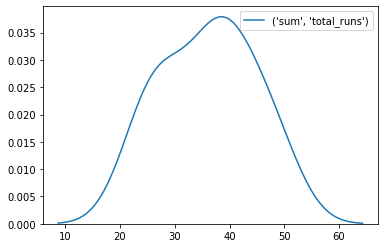

In [65]:
sb.kdeplot(dc_6["('sum\', \'total_runs\')"])

In [66]:
dc_6["('sum\', \'total_runs\')"].describe()

count    15.000000
mean     36.066667
std       8.463929
min      23.000000
25%      28.000000
50%      37.000000
75%      41.000000
max      50.000000
Name: ('sum', 'total_runs'), dtype: float64

In [67]:
srh_6 = main_df_team[(main_df_team['batting_team'] == "Sunrisers Hyderabad") & (main_df_team['over'] <6)]

srh_6 = srh_6.pivot_table(aggfunc = ['count','sum'] , index = ['match_id'] , values=  ['batsman_runs','total_runs'])
srh_6 = pd.DataFrame(srh_6.to_records())


In [68]:
srh_6

,match_id,"('count', 'batsman_runs')","('count', 'total_runs')","('sum', 'batsman_runs')","('sum', 'total_runs')"
0,21,31,31,30,31
1,39,30,30,49,49
2,394,31,31,24,25
3,428,30,30,33,33
4,469,32,32,43,47
5,489,30,30,33,44
6,531,31,31,28,32
7,561,31,31,31,32
8,618,31,31,42,43
9,628,30,30,42,42


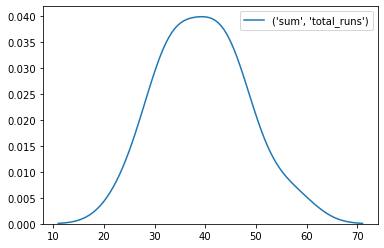

In [69]:
sb.kdeplot(srh_6["('sum\', \'total_runs\')"])

In [70]:
srh_6["('sum\', \'total_runs\')"].describe()

count    15.0000
mean     39.4000
std       8.3135
min      25.0000
25%      32.5000
50%      39.0000
75%      44.0000
max      57.0000
Name: ('sum', 'total_runs'), dtype: float64

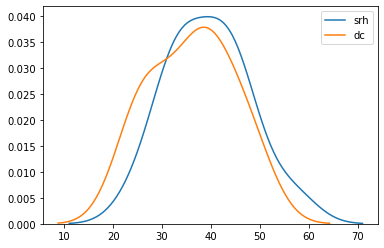

In [71]:
sb.kdeplot(srh_6["('sum\', \'total_runs\')"] , label = 'srh')
sb.kdeplot(dc_6["('sum\', \'total_runs\')"] , label = 'dc')

In [73]:
srh_all = df[(df['batting_team'] == 'Sunrisers Hyderabad') & (df['over'] <6)]
srh_all

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178364,11413,1,Sunrisers Hyderabad,Delhi Capitals,5,2,MK Pandey,MJ Guptill,AR Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178365,11413,1,Sunrisers Hyderabad,Delhi Capitals,5,3,MK Pandey,MJ Guptill,AR Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178366,11413,1,Sunrisers Hyderabad,Delhi Capitals,5,4,MK Pandey,MJ Guptill,AR Patel,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178367,11413,1,Sunrisers Hyderabad,Delhi Capitals,5,5,MJ Guptill,MK Pandey,AR Patel,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [74]:
srh_6 = srh_all.pivot_table(aggfunc = ['count','sum'] , index = ['match_id'] , values=  ['batsman_runs','total_runs'])
srh_6 = pd.DataFrame(srh_6.to_records())

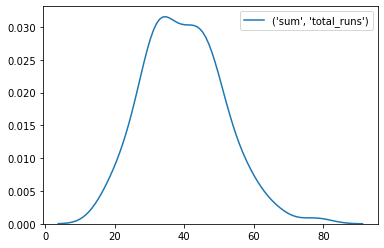

In [75]:
sb.kdeplot(srh_6["('sum\', \'total_runs\')"])

In [76]:
srh_6["('sum\', \'total_runs\')"].describe()

count    108.000000
mean      39.759259
std       11.354007
min       17.000000
25%       32.000000
50%       39.000000
75%       47.000000
max       78.000000
Name: ('sum', 'total_runs'), dtype: float64

In [77]:
dc_all = df[(df['batting_team'] == 'Delhi Capitals') & (df['over'] <6)]
dc_all

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1084,5,2,Delhi Capitals,Royal Challengers Bangalore,1,1,AP Tare,SW Billings,B Stanlake,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1085,5,2,Delhi Capitals,Royal Challengers Bangalore,1,2,AP Tare,SW Billings,B Stanlake,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
1086,5,2,Delhi Capitals,Royal Challengers Bangalore,1,3,AP Tare,SW Billings,B Stanlake,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1087,5,2,Delhi Capitals,Royal Challengers Bangalore,1,4,AP Tare,SW Billings,B Stanlake,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1088,5,2,Delhi Capitals,Royal Challengers Bangalore,1,5,SW Billings,AP Tare,B Stanlake,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178617,11414,1,Delhi Capitals,Chennai Super Kings,5,2,C Munro,S Dhawan,DL Chahar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178618,11414,1,Delhi Capitals,Chennai Super Kings,5,3,S Dhawan,C Munro,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178619,11414,1,Delhi Capitals,Chennai Super Kings,5,4,S Dhawan,C Munro,DL Chahar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178620,11414,1,Delhi Capitals,Chennai Super Kings,5,5,C Munro,S Dhawan,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [78]:
dc_6 = dc_all.pivot_table(aggfunc = ['count','sum'] , index = ['match_id'] , values=  ['batsman_runs','total_runs'])
dc_6 = pd.DataFrame(dc_6.to_records())

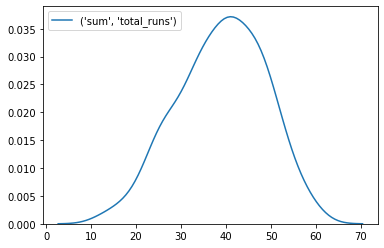

In [79]:
sb.kdeplot(dc_6["('sum\', \'total_runs\')"])

In [80]:
dc_6["('sum\', \'total_runs\')"].describe()

count    177.000000
mean      38.954802
std        9.721590
min       13.000000
25%       33.000000
50%       40.000000
75%       46.000000
max       60.000000
Name: ('sum', 'total_runs'), dtype: float64

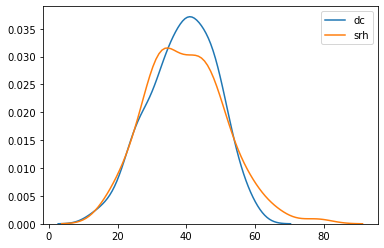

In [81]:
sb.kdeplot(dc_6["('sum\', \'total_runs\')"] ,label = 'dc')
sb.kdeplot(srh_6["('sum\', \'total_runs\')"] , label = 'srh')

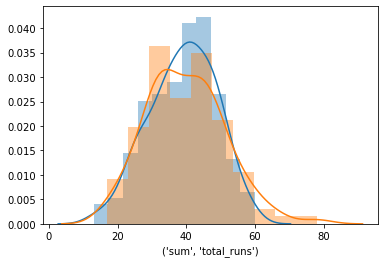

In [82]:
sb.distplot(dc_6["('sum\', \'total_runs\')"] ,label = 'dc')
sb.distplot(srh_6["('sum\', \'total_runs\')"] , label = 'srh')

# Take Aways:
### 1 - Generally SRH score more than DC
### 2 -There is not much of a difference

# Ques 4 ans - (6-14)

In [83]:
#################################################################################################################################

# Ques 5 - Total Extras ?

In [116]:
main_df_team

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
4810,21,1,Sunrisers Hyderabad,Delhi Capitals,1,1,DA Warner,S Dhawan,J Yadav,0,...,0,0,1,0,1,1,2,NaN,NaN,NaN
4811,21,1,Sunrisers Hyderabad,Delhi Capitals,1,2,S Dhawan,DA Warner,J Yadav,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
4812,21,1,Sunrisers Hyderabad,Delhi Capitals,1,3,S Dhawan,DA Warner,J Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
4813,21,1,Sunrisers Hyderabad,Delhi Capitals,1,4,DA Warner,S Dhawan,J Yadav,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4814,21,1,Sunrisers Hyderabad,Delhi Capitals,1,5,DA Warner,S Dhawan,J Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178586,11413,2,Delhi Capitals,Sunrisers Hyderabad,20,2,A Mishra,K Paul,K Ahmed,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178587,11413,2,Delhi Capitals,Sunrisers Hyderabad,20,3,K Paul,A Mishra,K Ahmed,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178588,11413,2,Delhi Capitals,Sunrisers Hyderabad,20,4,K Paul,A Mishra,K Ahmed,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178589,11413,2,Delhi Capitals,Sunrisers Hyderabad,20,5,A Mishra,K Paul,K Ahmed,0,...,0,0,0,0,0,0,0,A Mishra,obstructing the field,NaN


In [117]:
main_df_team.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [118]:
cols = ['match_id' , 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs' , 'extra_runs']
extra = main_df_team[cols]

In [120]:
extra

,match_id,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,extra_runs
4810,21,0,0,0,1,0,1
4811,21,0,0,0,0,0,0
4812,21,0,0,0,0,0,0
4813,21,0,0,0,0,0,0
4814,21,0,0,0,0,0,0
...,...,...,...,...,...,...,...
178586,11413,0,0,0,0,0,0
178587,11413,0,0,0,0,0,0
178588,11413,0,0,0,0,0,0
178589,11413,0,0,0,0,0,0


In [121]:
extra = extra.replace(list(range(1,15)), 1)
extra

,match_id,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,extra_runs
4810,21,0,0,0,1,0,1
4811,21,0,0,0,0,0,0
4812,21,0,0,0,0,0,0
4813,21,0,0,0,0,0,0
4814,21,0,0,0,0,0,0
...,...,...,...,...,...,...,...
178586,11413,0,0,0,0,0,0
178587,11413,0,0,0,0,0,0
178588,11413,0,0,0,0,0,0
178589,11413,0,0,0,0,0,0


In [124]:
w = extra.pivot_table(index = ['match_id'] , values=  ['wide_runs'] , aggfunc = ['sum'])
b = extra.pivot_table(index = ['match_id'] , values=  ['bye_runs'] , aggfunc = ['sum'])
lb = extra.pivot_table(index = ['match_id'] , values=  ['legbye_runs'] , aggfunc = ['sum'])
nb = extra.pivot_table(index = ['match_id'] , values=  ['noball_runs'] , aggfunc = ['sum'])
pr = extra.pivot_table(index = ['match_id'] , values=  ['penalty_runs'] , aggfunc = ['sum'])
ex = extra.pivot_table(index = ['match_id'] , values=  ['extra_runs'] , aggfunc = ['sum'])


In [125]:
w = pd.DataFrame(w.to_records())
b = pd.DataFrame(b.to_records())
lb = pd.DataFrame(lb.to_records())
nb = pd.DataFrame(nb.to_records())
pr = pd.DataFrame(pr.to_records())
ex = pd.DataFrame(ex.to_records())



In [126]:
w

,match_id,"('sum', 'wide_runs')"
0,21,3
1,39,4
2,394,5
3,428,4
4,469,4
5,489,4
6,531,7
7,561,4
8,618,6
9,628,7


In [127]:
w = pd.merge(w , b , how = 'inner' , on = 'match_id')
w = pd.merge(w , lb , how = 'inner' , on = 'match_id')
w = pd.merge(w , nb , how = 'inner' , on = 'match_id')
w = pd.merge(w , pr , how = 'inner' , on = 'match_id')
w = pd.merge(w , ex , how = 'inner' , on = 'match_id')


In [128]:
w

,match_id,"('sum', 'wide_runs')","('sum', 'bye_runs')","('sum', 'legbye_runs')","('sum', 'noball_runs')","('sum', 'penalty_runs')","('sum', 'extra_runs')"
0,21,3,3,3,2,0,11
1,39,4,0,3,1,0,8
2,394,5,0,3,2,0,10
3,428,4,1,1,1,0,7
4,469,4,0,6,1,0,11
5,489,4,1,4,1,0,10
6,531,7,2,3,0,0,12
7,561,4,0,4,0,0,8
8,618,6,0,3,2,0,11
9,628,7,1,5,0,0,13


In [129]:
w['sum'] = w["('sum\', \'bye_runs\')"]+w["('sum\', \'extra_runs\')"]+w["('sum\', \'legbye_runs\')"]+w["('sum\', \'noball_runs\')"] + w["('sum\', \'penalty_runs\')"] + w["('sum\', \'wide_runs\')"]


In [130]:
w

,match_id,"('sum', 'wide_runs')","('sum', 'bye_runs')","('sum', 'legbye_runs')","('sum', 'noball_runs')","('sum', 'penalty_runs')","('sum', 'extra_runs')",sum
0,21,3,3,3,2,0,11,22
1,39,4,0,3,1,0,8,16
2,394,5,0,3,2,0,10,20
3,428,4,1,1,1,0,7,14
4,469,4,0,6,1,0,11,22
5,489,4,1,4,1,0,10,20
6,531,7,2,3,0,0,12,24
7,561,4,0,4,0,0,8,16
8,618,6,0,3,2,0,11,22
9,628,7,1,5,0,0,13,26


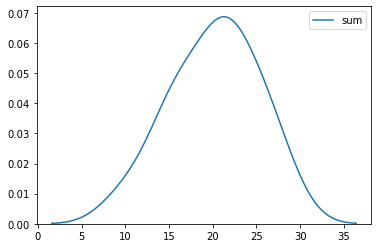

In [131]:
sb.kdeplot(w['sum'])

In [132]:
cols = ['match_id' , 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs' , 'extra_runs']
extra = df[cols]

In [133]:
extra = extra.replace(list(range(1,15)), 1)
extra

,match_id,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,extra_runs
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...
179073,11415,0,0,0,0,0,0
179074,11415,0,0,0,0,0,0
179075,11415,0,0,0,0,0,0
179076,11415,0,0,0,0,0,0


In [134]:
w = extra.pivot_table(index = ['match_id'] , values=  ['wide_runs'] , aggfunc = ['sum'])
b = extra.pivot_table(index = ['match_id'] , values=  ['bye_runs'] , aggfunc = ['sum'])
lb = extra.pivot_table(index = ['match_id'] , values=  ['legbye_runs'] , aggfunc = ['sum'])
nb = extra.pivot_table(index = ['match_id'] , values=  ['noball_runs'] , aggfunc = ['sum'])
pr = extra.pivot_table(index = ['match_id'] , values=  ['penalty_runs'] , aggfunc = ['sum'])
ex = extra.pivot_table(index = ['match_id'] , values=  ['extra_runs'] , aggfunc = ['sum'])

w = pd.DataFrame(w.to_records())
b = pd.DataFrame(b.to_records())
lb = pd.DataFrame(lb.to_records())
nb = pd.DataFrame(nb.to_records())
pr = pd.DataFrame(pr.to_records())
ex = pd.DataFrame(ex.to_records())



In [135]:
w = pd.merge(w , b , how = 'inner' , on = 'match_id')
w = pd.merge(w , lb , how = 'inner' , on = 'match_id')
w = pd.merge(w , nb , how = 'inner' , on = 'match_id')
w = pd.merge(w , pr , how = 'inner' , on = 'match_id')
w = pd.merge(w , ex , how = 'inner' , on = 'match_id')


In [136]:
w['sum'] = w["('sum\', \'bye_runs\')"]+w["('sum\', \'extra_runs\')"]+w["('sum\', \'legbye_runs\')"]+w["('sum\', \'noball_runs\')"] + w["('sum\', \'penalty_runs\')"] + w["('sum\', \'wide_runs\')"]


In [137]:
w

,match_id,"('sum', 'wide_runs')","('sum', 'bye_runs')","('sum', 'legbye_runs')","('sum', 'noball_runs')","('sum', 'penalty_runs')","('sum', 'extra_runs')",sum
0,1,121,6,47,9,0,183,366
1,15,5,0,3,3,0,11,22
2,16,12,0,4,2,0,18,36
3,17,10,2,4,0,0,16,32
4,18,6,1,3,0,0,10,20
...,...,...,...,...,...,...,...,...
738,11347,9,0,2,2,0,13,26
739,11412,3,0,2,3,0,8,16
740,11413,10,1,2,1,0,14,28
741,11414,4,0,4,1,0,9,18


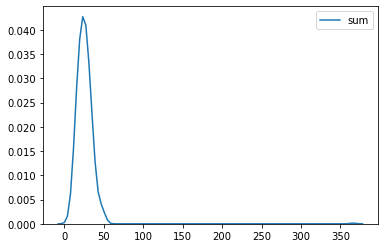

In [138]:
sb.kdeplot(w['sum'])

In [139]:
w['sum'].describe()

count    743.000000
mean      25.672948
std       15.033723
min        4.000000
25%       20.000000
50%       24.000000
75%       30.000000
max      366.000000
Name: sum, dtype: float64

# Take Aways:
### 1 = Generally , there are around 10 count
### 2 - But while taking values , it ranges more


# Ques 5 ans  - (0-8)